## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "adiabaticExpansion",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["hard"],
    "topic": "Properties",
    "lecture_reference": {
        "lecture_id": "1_fclugwz7",
        "subtopics": [
            {
              "key": "Fa25-L4a-5.0",
              "title": "Moving boundary work: Adiabatic process",
            }
        ]
    },
    "book_reference": {
          "chapter_number": 4,
          "title": "Energy Analysis of Closed Systems",
        "sections": [
            "Moving Boundary Work",
            "Energy Balance for Closed Systems",
            "Specific Heats",
            "Internal Energy, Enthalpy, and Specific Heats of Ideal Gases",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
**Goal**: Show that for an ideal gas in a closed system undergoing adiabatic expansion, that $ p V^\kappa = \text{const} $.

## 2. Schematic
Show a piston expanding some distance. The control volume should be drawn inside of the piston cylinder. No heat should be transferred in or out. Work should be shown to be transferred out. 


## 3. Assumptions and Approximations
* **Ideal Gas Model** (Justification: Air at these conditions behaves as an ideal gas, $p v = R T$)
* No heat transfer ($Q_\text{in}=Q_\text{out}=0$). (Justification: Adiabatic means no heat transfer.)
* Neglect changes in kinetic and potential energy ($\Delta KE\approx0$, $\Delta PE\approx0$). (Justification: The velocities are typically low, or the change in height is negligible compared to the enthalpy change.)
* Work is transferred only through boundary work ($p dV$).
* Constant values for specific heat ($c_p=\text{const}$, $c_v=\text{const}$). (Justification: While these values do change with temperature, they don't change appreciably over the temperature ranges we are interested in here.)

## 4. Physical Laws and Governing Equations
* Conservation of energy
* Definition of specific heat and its relation to changes in internal energy

$$\Delta E_\text{CV} = E_\text{in} - E_\text{out} $$

$$\Delta U + \Delta KE + \Delta PE = (W_\text{in} + Q_\text{in}) - (W_\text{out} + Q_\text{out})  $$

$$\Delta U = - W_\text{out}$$

$$\Delta U = - W_\text{out}$$

We can write this in differential form:

$$dU = - \delta W_\text{out} $$

$$dU = - p dV \tag{1}$$

Recall the definition of $c_V$:

$$c_V = \left( \frac{\partial u}{\partial T} \right)_V$$

That is, if we transfer heat to a control volume, and if the volume is kept constant, then changes in internal energy can be related to changes in temperature through a constant. 

$$\implies du = c_V dT \tag{2}$$

Combining equations (1) and (2), and including the mass of the gas in the piston, $m$, we have:

$$m du = m c_V dT = - p dV \tag{3}$$

We would like to replace temperature with $p$ and $V$. For this we can use the ideal gas law:

$$p V = m R T \tag{4}$$

Taking the differential:

$$d \left(p V\right) = m R dT$$

$$V dp + p dV = m R dT$$

Rearranging:

$$dT = \frac{V dp + p dV}{m R} \tag{5}$$

Combining equations (5) and (3), we have:

$$m c_V \left( \frac{V dp + p dV}{m R} \right) = - p dV$$

Simplifying:

$$c_V \left( V dp + p dV \right) = - R p dV$$

$$ c_V V dp + c_V p dV + R p dV = 0 $$

$$ (c_V + R) p dV +  c_V V dp = 0 $$

$$ \frac{(c_V + R)}{c_V}\frac{dV}{V} +  \frac{dp}{p} = 0 $$

$$ \frac{(c_V + R)}{c_V}\int \frac{dV}{V} +  \int \frac{dp}{p} = 0 $$

$$ \frac{(c_V + R)}{c_V} \ln V +  \ln p = \text{const} $$

Assuming constant specific heats, we can define a constant:

$$ \kappa \equiv \frac{(c_V + R)}{c_V} \tag{7}$$

$$ \kappa \ln V +  \ln p = \text{const} $$

$$ \ln V^\kappa +  \ln p = \text{const} $$

$$ \ln pV^\kappa  = \text{const} $$

$$ pV^\kappa  = \text{const} \tag{8}$$


In [7]:
## 5. Properties (Code Cell)
# we can determine the specific heat of air at room temperature and pressure conditions
!pip install pyCalor
from pyCalor import thermo as th
import matplotlib.pyplot as plt
import numpy as np

T_C = 20
p_Pa = 101325
substance = 'air'

st = th.state(substance,T=(T_C,'C'),p=(p_Pa,'Pa'))
cp_kJperKgPerK = st.cp
cv_kJperKgPerK = st.cv
R_kJperKgPerK = st.R

k = cp_kJperKgPerK/cv_kJperKgPerK

Text(0, 0.5, '$p$ (Pa)')

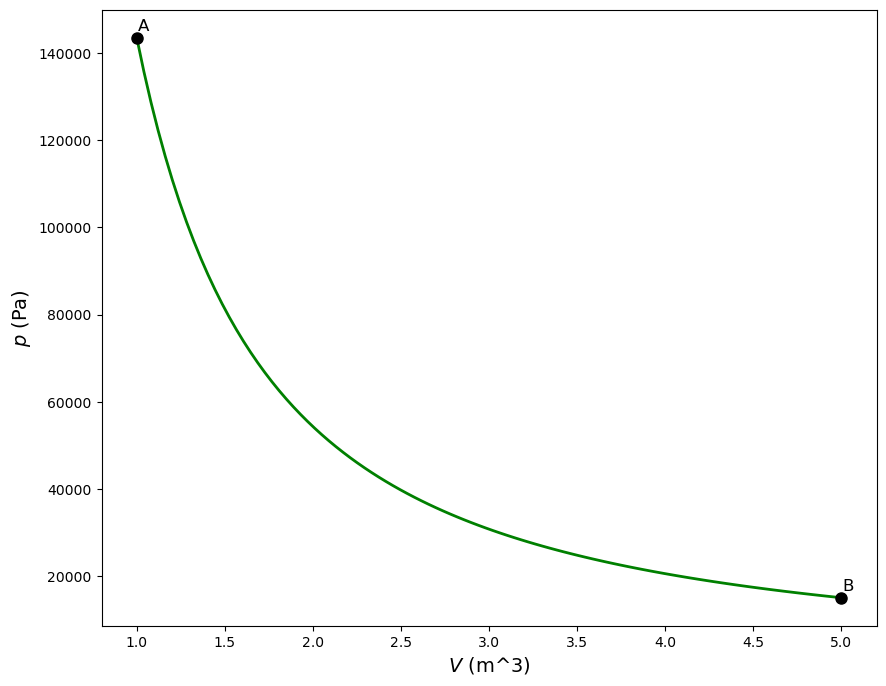

In [15]:
# 6 Calculations (Code Cell)
# 6A. We can see what the process looks like by making some assumptions about the initial and final conditions:
# Define the initial and final volumes for the processes
V_initial = 1.0  # Initial volume in m^3
V_final = 5.0    # Final volume in m^3
# Define initial temperature
T_initial = 500 # K
# Define the initial pressure using the ideal gas law
P_initial = (R_kJperKgPerK*1e3 * T_initial) / V_initial # Pa
# Define the range of volumes for the plot
V = np.linspace(V_initial, V_final, 100)

# 6B. Adiabatic Process (No Heat Transfer)
constant_adiabatic = P_initial * (V_initial**k)
p_adiabatic = constant_adiabatic / (V**k)
P_final_adiabatic = constant_adiabatic / (V_final**k)

# 6C. Plotting
plt.figure(figsize=(10, 8))
plt.plot(V, p_adiabatic, label='Adiabatic ($pV^{\kappa}=$ constant)', color='green', linewidth=2)
# Add a marker for the initial state "A"
plt.plot(V_initial, P_initial, 'o', color='black', markersize=8)
plt.annotate('A', xy=(V_initial, P_initial), xytext=(5, 5), textcoords='offset points', ha='center', fontsize=12)
# Add markers and labels for the final states "B"
plt.plot(V_final, P_final_adiabatic, 'o', color='black', markersize=8)
plt.annotate('B', xy=(V_final, P_final_adiabatic), xytext=(5, 5), textcoords='offset points', ha='center', fontsize=12)
# Add labels and title
plt.xlabel('$V$ (m^3)', fontsize=14)
plt.ylabel('$p$ (Pa)', fontsize=14)

## 7. Summary and Reasoning
We were able to prove that $p V^{\kappa} = \text{constant}$ for an adiabatic expansion process. We also see from this that we are able to relate pressure to volume for a process from A to B. That means we will be able to determine the boundary work done for such a process. This will be useful when we start to analyze cycles, such as the Carnot cycle, which has adiabatic expansion and compression processes. 

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---